# About Dataset
## Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Update (03/05/2021)
A simulator for transaction data has been released as part of the practical handbook on Machine Learning for Credit Card Fraud Detection - https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html. We invite all practitioners interested in fraud detection datasets to also check out this data simulator, and the methodologies for credit card fraud detection presented in the book.

## Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

In [75]:
import pandas as pd
import numpy as np

In [76]:
df = pd.read_csv('creditcard.csv')

In [77]:
from scipy import stats
cols = ['Time', 'Amount', 'class']

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        corr, p_value = stats.pearsonr(df[cols[i]], df[cols[j]])
        print("Correlation coefficient between", cols[i], "and", cols[j], ":", corr)
        print("p-value between", cols[i], "and", cols[j], ":", p_value)

Correlation coefficient between Time and Amount : -0.010596373389031489
p-value between Time and Amount : 1.557251061410762e-08
Correlation coefficient between Time and class : -0.012322570929287577
p-value between Time and class : 4.818268891073861e-11
Correlation coefficient between Amount and class : 0.005631753006789839
p-value between Amount and class : 0.002651220649093202


In [78]:
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [79]:
df['class'].value_counts()

0    284315
1       492
Name: class, dtype: int64

In [80]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


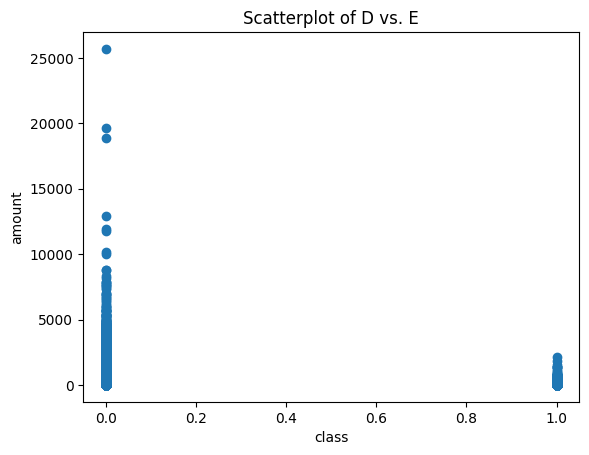

In [10]:
import matplotlib.pyplot as plt


plt.scatter(x = df['class'] , y = df['Amount'] )
plt.xlabel('class')  # x-axis label
plt.ylabel('amount')  # y-axis label
plt.title('Scatterplot of D vs. E')  # title of the plot
plt.show()

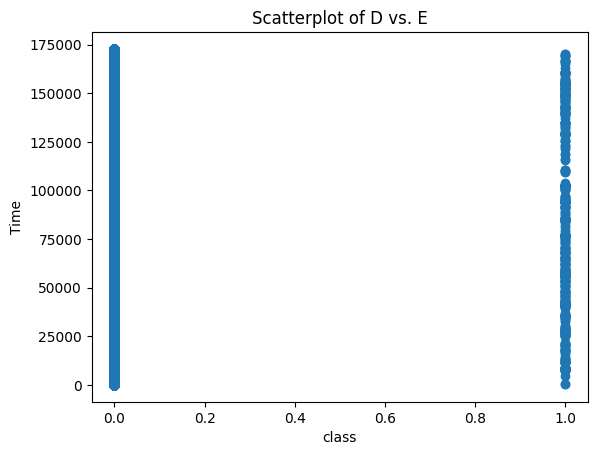

In [54]:
import matplotlib.pyplot as plt


plt.scatter(x = df['class'] , y = df['Time'] )
plt.xlabel('class')  # x-axis label
plt.ylabel('Time')  # y-axis label
plt.title('Scatterplot of D vs. E')  # title of the plot
plt.show()

<Axes: >

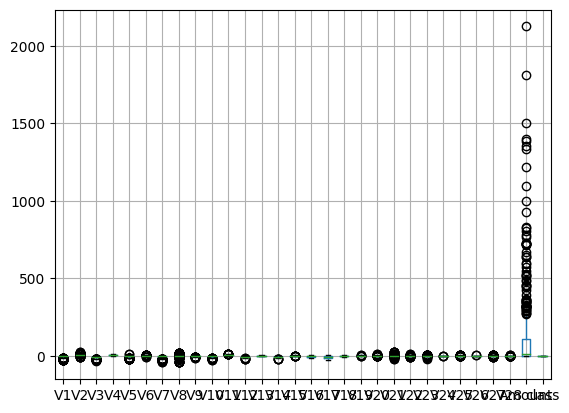

In [12]:
df[df['class']==1].boxplot()

<Axes: >

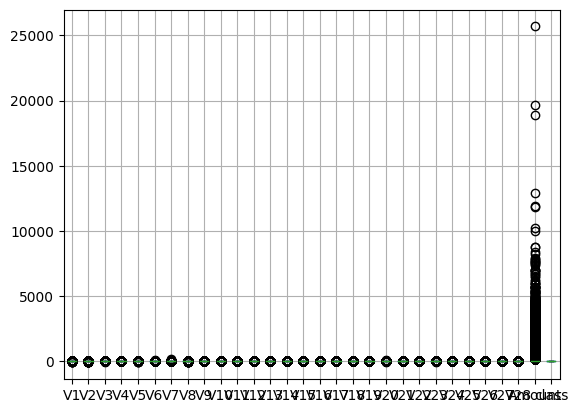

In [13]:
df[df['class']==0].boxplot()

In [81]:
df['class'].value_counts()

0    284315
1       492
Name: class, dtype: int64

In [82]:


# Separate the majority and minority class
non_fraud = df[df['class'] == 0]
fraud = df[df['class'] == 1]

# Undersample the majority class
undersampled_non_fraud = non_fraud.sample(n=30*len(fraud), random_state=42)

# Concatenate the undersampled majority class with the minority class
df_balanced = pd.concat([undersampled_non_fraud, fraud])

# Shuffle the balanced dataset
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Check the class distribution in the balanced dataset
class_counts = df_balanced['class'].value_counts()
print(class_counts)

# to balance the dataset , amount is taken less than 2000 as much of fraud is taking place around this region.
df_curated = df_balanced[df_balanced['Amount'] < 2000]


0    14760
1      492
Name: class, dtype: int64


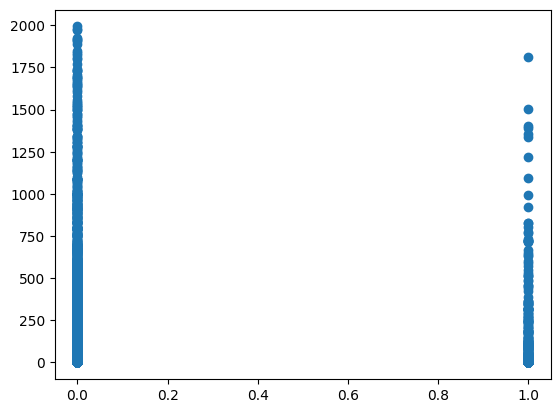

In [83]:
plt.scatter( x= df_curated['class'] , y = df_curated['Amount'])

In [84]:
df_curated.shape

(15217, 31)

In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow as tf


# Split the dataset into features (X) and target variable (y)
X = df_curated.drop(columns=['class']).values
y = df_curated['class'].values

# Perform feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize lists to store training and testing metrics
train_accuracies = []
test_accuracies = []
train_precisions = []
test_precisions = []
train_recalls = []
test_recalls = []
train_losses = []
test_losses = []

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kfold.split(X):
    # Split the data into training and testing sets for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Build your TensorFlow model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(30,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the training and testing sets
    train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Make predictions
    train_probabilities = model.predict(X_train)
    test_probabilities = model.predict(X_test)

    # Convert probabilities to class labels
    train_predictions = np.round(train_probabilities).flatten()
    test_predictions = np.round(test_probabilities).flatten()

    # Calculate metrics
    train_precision = precision_score(y_train, train_predictions)
    test_precision = precision_score(y_test, test_predictions)
    train_recall = recall_score(y_train, train_predictions)
    test_recall = recall_score(y_test, test_predictions)

    # Store the metrics
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_precisions.append(train_precision)
    test_precisions.append(test_precision)
    train_recalls.append(train_recall)
    test_recalls.append(test_recall)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Print the average training and testing metrics
print("Average Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy:", np.mean(test_accuracies))
print("Average Training Precision:", np.mean(train_precisions))
print("Average Testing Precision:", np.mean(test_precisions))
print("Average Training Recall:", np.mean(train_recalls))
print("Average Testing Recall:", np.mean(test_recalls))
print("Average Training Loss:", np.mean(train_losses))
print("Average Testing Loss:", np.mean(test_losses))


96/96 [==============================] - 0s 1ms/step
Average Training Accuracy: 0.9961884975433349
Average Testing Accuracy: 0.9940856099128723
Average Training Precision: 0.990373686347667
Average Testing Precision: 0.9694763950019581
Average Training Recall: 0.8906377320732949
Average Testing Recall: 0.8423690319342494
Average Training Loss: 0.01584553122520447
Average Testing Loss: 0.027327265962958334
